In [1]:
using DelimitedFiles
using PyPlot
using Random

In [2]:
all_words = readdlm("english_words.txt", '\n', String);

In [3]:
function acceptable_word(word)
    if length(word) != 5
        return false
    end
    if all([letter in [char for char in 'a':'z'] for letter in word])
        return true
    else
        return false
    end
end

acceptable_word (generic function with 1 method)

In [4]:
five_lettr_words = String[]
for word in all_words
    if acceptable_word(word)
        push!(five_lettr_words, word)
    end
end

In [5]:
writedlm("5_letter_words.txt", five_lettr_words, '\n')

In [6]:
include("wordle.jl")
include("WordleKiller.jl")

Main.WordleKiller

In [8]:
WordleKiller.play_one_game(guess_alg = WordleKiller.random_word)

Algorithm won! Target word was ephod

The guesses made were:

Round 1: fists
Round 2: manly
Round 3: hover
Round 4: ephod


(true, 4)

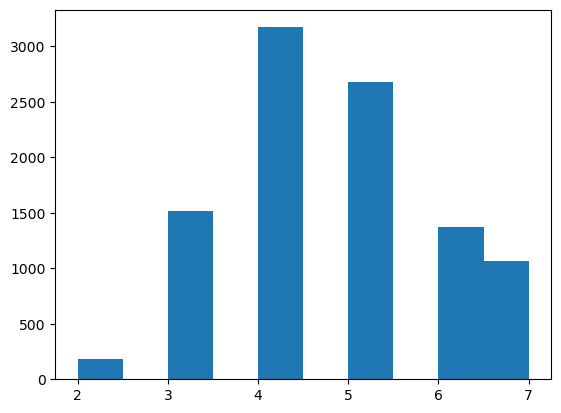

Winrate is 0.8933


([186.0, 0.0, 1514.0, 0.0, 3173.0, 0.0, 2683.0, 0.0, 1377.0, 1067.0], [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0], (PyObject <matplotlib.patches.Rectangle object at 0x000000000159D700>, PyObject <matplotlib.patches.Rectangle object at 0x000000000159D580>, PyObject <matplotlib.patches.Rectangle object at 0x000000000159DC10>, PyObject <matplotlib.patches.Rectangle object at 0x000000000159DEE0>, PyObject <matplotlib.patches.Rectangle object at 0x00000000015B61F0>, PyObject <matplotlib.patches.Rectangle object at 0x00000000015B64C0>, PyObject <matplotlib.patches.Rectangle object at 0x00000000015B6790>, PyObject <matplotlib.patches.Rectangle object at 0x00000000015B6A60>, PyObject <matplotlib.patches.Rectangle object at 0x00000000015B6D30>, PyObject <matplotlib.patches.Rectangle object at 0x0000000001816070>))

In [10]:
wins = 0
losses = 0
rounds_dist = []
for i in 1:10000
    a_win, rounds = WordleKiller.play_one_game(false, guess_alg = WordleKiller.random_word)
    push!(rounds_dist, rounds)
    if a_win
        wins += 1
    else
        losses += 1
    end
end
WR = wins/(wins+losses)
println("Winrate is $WR")
hist(rounds_dist)

In [54]:
function generate_random_database(N)
    database = String[]
    for i in 1:N
        str = ""
        found_str = false
        while !found_str
            str = randstring('a':'z', 5)
            if !(str in database)
                found_str = true
            end
        end
        push!(database, str)
    end
    return database
end

generate_random_database (generic function with 1 method)

In [69]:
DB_sizes = collect(1000:1000:100000)
WRs = zeros(length(DB_sizes))
for (n, N) in enumerate(DB_sizes)
    wins = 0
    losses = 0
    database = generate_random_database(N)
    for i in 1:10000
        a_win, rounds = WordleKiller.play_one_game(false, database = database, guess_alg = WordleKiller.random_word)
        if a_win
            wins += 1
        else
            losses += 1
        end
    end
    WRs[n] = wins/(wins+losses)
end

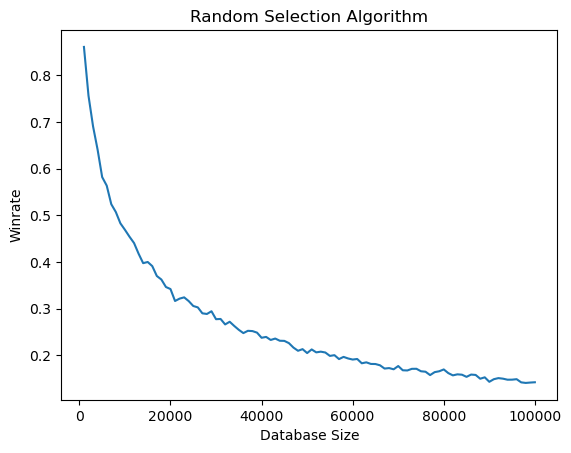

PyObject Text(0.5, 1.0, 'Random Selection Algorithm')

In [70]:
plot(DB_sizes, WRs)
xlabel("Database Size")
ylabel("Winrate")
title("Random Selection Algorithm")